# Lab 2: Practicing with Probabilities and Expectations
Pandas edition (Partial)

In [58]:
import numpy as np
import pandas as pd

url="http://math.bu.edu/people/sussman/MA681_FA17/data/hurricane_data.csv"
c=pd.read_csv(url)

1. Load the data and print a preview of it.

In [8]:
c.dtypes

id               object
name             object
date             object
time              int64
event            object
status           object
latitude        float64
longitude       float64
max_wind          int64
min_pressure    float64
year              int64
month             int64
day               int64
dtype: object

In [6]:
c.head(10)

,id,name,date,time,event,status,latitude,longitude,max_wind,min_pressure,year,month,day
0,AL011851,UNNAMED,1851-06-25,0,NaN,HU,28.0,-94.8,80,NaN,1851,6,25
1,AL011851,UNNAMED,1851-06-25,600,NaN,HU,28.0,-95.4,80,NaN,1851,6,25
2,AL011851,UNNAMED,1851-06-25,1200,NaN,HU,28.0,-96.0,80,NaN,1851,6,25
3,AL011851,UNNAMED,1851-06-25,1800,NaN,HU,28.1,-96.5,80,NaN,1851,6,25
4,AL011851,UNNAMED,1851-06-25,2100,L,HU,28.2,-96.8,80,NaN,1851,6,25
5,AL011851,UNNAMED,1851-06-26,0,NaN,HU,28.2,-97.0,70,NaN,1851,6,26
6,AL011851,UNNAMED,1851-06-26,600,NaN,TS,28.3,-97.6,60,NaN,1851,6,26
7,AL011851,UNNAMED,1851-06-26,1200,NaN,TS,28.4,-98.3,60,NaN,1851,6,26
8,AL011851,UNNAMED,1851-06-26,1800,NaN,TS,28.6,-98.9,50,NaN,1851,6,26
9,AL011851,UNNAMED,1851-06-27,0,NaN,TS,29.0,-99.4,50,NaN,1851,6,27


<ol start=2><li>Compute the probability that a recorded disturbance will reach the Hurricane status. </li></ol>

In [27]:
# The inline function
#     lambda x: "HU" in list(x)
# returns true if list(x), aka the list status fields associated with an id, contains "HU"

# agg operates on the status column of a df grouped by ID

count_storms_reaching_HU_status = sum(c.groupby('id').status.agg(lambda x: "HU" in list(x)))
total_count_storms = c.id.nunique()
count_storms_reaching_HU_status / total_count_storms

0.50282485875706218

<ol start=3><li> For each status, “HU”, “TS”, and “TD”, compute the probability that probability the recorded minimum pressure is less than 990 millibars given that the storm is currently at that status. </li></ol>

In [53]:
c_grouped = c[c["min_pressure"].notnull()].groupby('status').min_pressure
c_grouped.agg(lambda x: sum(x<990)/len(x))

status
HU    0.892214
TD    0.001808
TS    0.082317
Name: min_pressure, dtype: float64

4(a) Compute the average maximum wind speed over all recordings. 

In [49]:
c.max_wind.mean()

55.052799923616746

4(b) Compute the average maximum maximum wind speed over all storms. 

In [66]:
c.groupby('id').max_wind.max().mean()

67.81638418079096

4(c) Compute the expected maximum wind speed, over recordings, given that the position of the storm is west of 75W. 

In [57]:
c[c.longitude < -75].max_wind.mean()

52.310708086430836

4(d) Compute the variance of the maximum maximum wind speeds over all storms.

In [67]:
c.groupby('id').max_wind.max().std()

29.351723002601698

<ol start=5><li>Compute the correlation matrix for the latitude, longitude, maximum wind speed, and minimum pressure. Note that to ignore the NA values you might need to set the use parameter for the cor function.</li></ol>

              latitude  longitude  max_wind  min_pressure
latitude      1.000000  -0.122307  0.099217     -0.130718
longitude    -0.122307   1.000000 -0.047540      0.099091
max_wind      0.099217  -0.047540  1.000000     -0.938205
min_pressure -0.130718   0.099091 -0.938205      1.000000


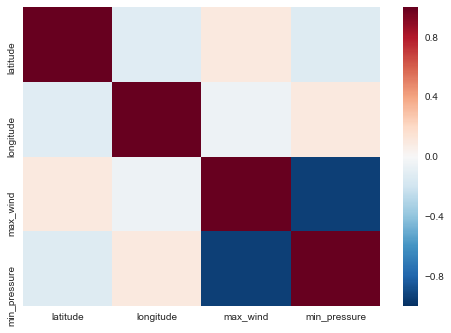

In [86]:
# c.isnull().sum() shows that only min_pressure is possibly null

c_reduced = c[['latitude','longitude','max_wind','min_pressure']][c.min_pressure.notnull()].corr()
print(corr)

import matplotlib.pyplot as plt
import seaborn as sns # just a conventional alias, don't know why
sns.heatmap(c_reduced)
plt.show()

We can see that max wind speed is highly correlated with min pressure.